Author: Curtis Bovell

Date: March 13, 2023

# Project Overview

This project aims to cluster customers based on their demographic and spending behaviour. The data was collected from customers at a mall, and includes information on their customer ID, age, annual income, spending score, and gender.

We started by exploring the data through summary statistics, data cleaning, and visualization techniques. We conducted univariate analysis on the annual income column and bivariate analysis on the annual income and spending score columns to identify potential clusters.

After preprocessing the data by scaling the features, we used the K-means clustering algorithm to cluster the customers into groups based on their similarities. We evaluated the model performance using the inertia and silhouette score and chose the optimal number of clusters using the elbow method. Finally, we visualized the clusters and interpreted the results.

The insights gained from this project can be used to develop targeted marketing strategies and increase customer satisfaction and loyalty. The project demonstrates the power of clustering algorithms in analyzing customer data and identifying hidden patterns and insights.

# Dataset used 

Data: 'Mall_Customers.csv'

# Key steps involved:
- Importing the necessary libraries
- Loading the dataset into a Pandas dataframe
- Exploring the dataset and visualizing the relationships between variables
- Preprocessing the data and scaling the features
- Using K-means clustering algorithm to cluster the customers
- Evaluating the model performance and interpreting the results

# Future work:
- Implementing other clustering algorithms and comparing their performance
- Collecting more data and re-evaluating the model to improve its accuracy

# Data Collection

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
sns.set_style('whitegrid')

Get the data from the mall customers

In [5]:
df = pd.read_csv("C:/Users/bovel/Downloads/Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Anaylsis

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\bovel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bovel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


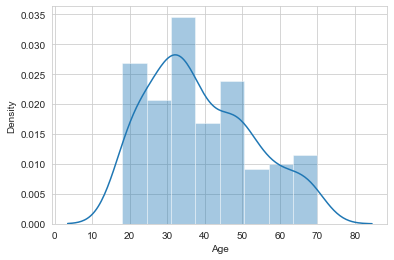

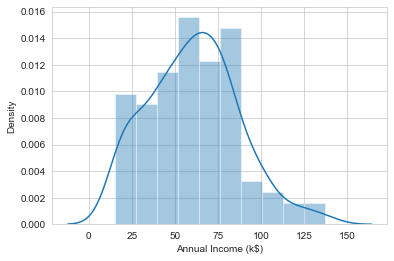

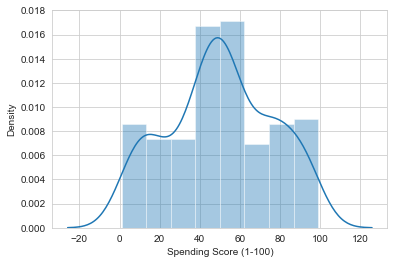

In [18]:
# Histogram to show the density for each column 

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

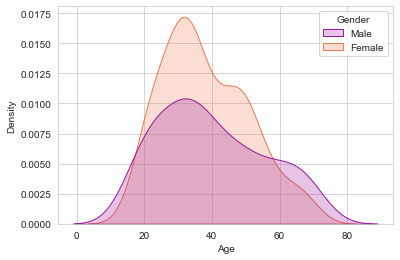

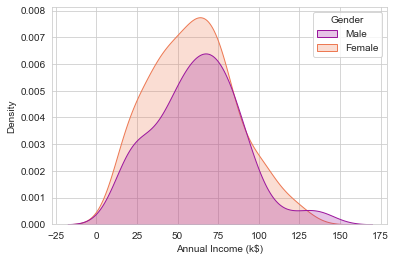

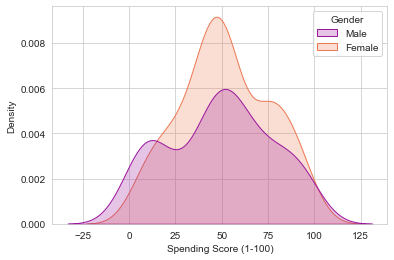

In [32]:
# Kdeplot to show the density for each column with a hue for the gender to show the comparison of the distribution. 

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade=True, hue=df['Gender'], legend=True, palette = 'plasma')

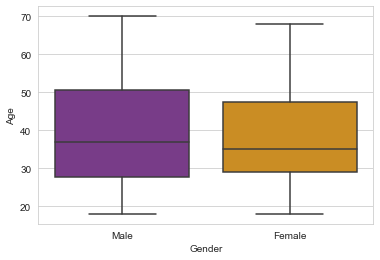

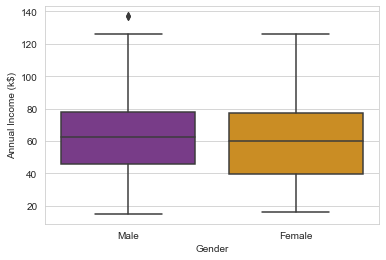

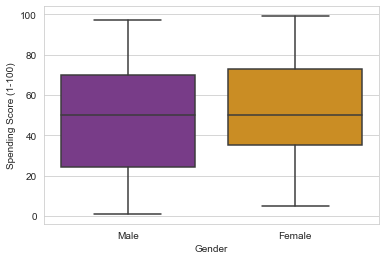

In [31]:
# Boxplot to show the comparison between each column to the gender

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i], palette= 'CMRmap')

In [33]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

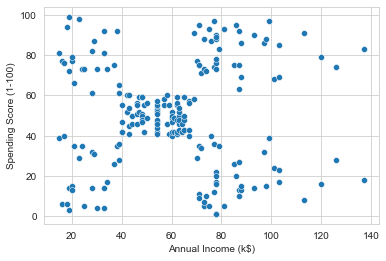

In [34]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

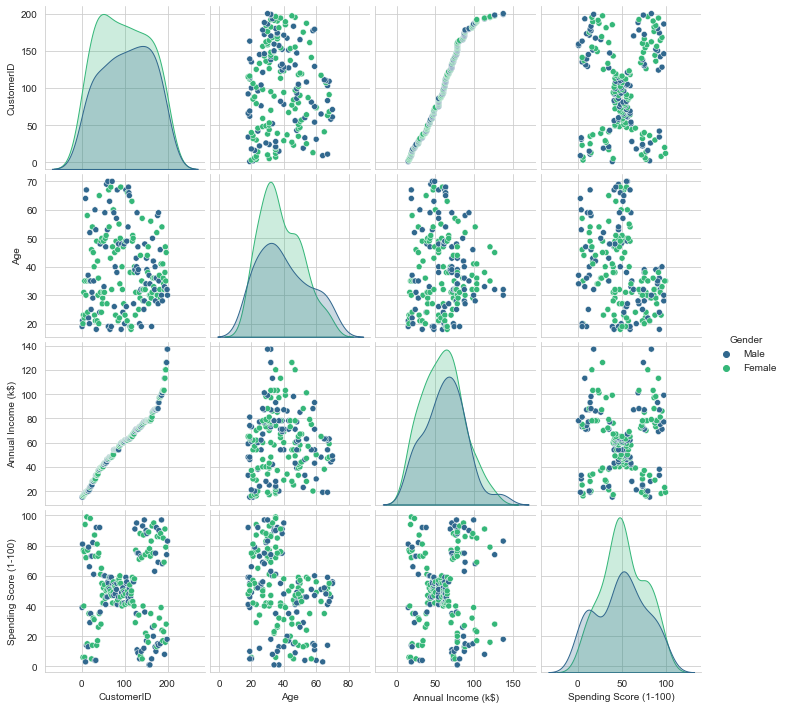

In [37]:
# shows us all of the distributions for each column in one line of code
sns.pairplot(df, palette='viridis', hue='Gender')

In [38]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

C:\Users\bovel\AppData\Local\Temp\ipykernel_8580\280628938.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Correlation

In [39]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

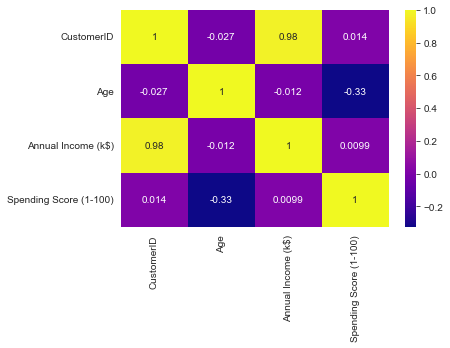

In [40]:
sns.heatmap(df.corr(), cmap='plasma', annot=True)

# Machine Learning process
Now we will use the k-means clustering model from sklearn to group each of the individuals and use the elbow technique to find the optimal amount of clustering we need

# Univariate Clustering

In [50]:
clustering1 = KMeans(n_clusters=6) # choose a random k 

In [51]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [52]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3])

In [53]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [55]:
df['Income Cluster'].value_counts()

0    48
5    42
4    42
1    32
2    28
3     8
Name: Income Cluster, dtype: int64

We need to use the elbow method for finding the best amount of clusters which will be shown below

In [56]:
clustering1.inertia_

5050.904761904763

In [57]:
# Finds the optimal amount of clusters needed for the data by using a for loop to iterate. 
intertia_scores= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

C:\Users\bovel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3941.4163614163617,
 2862.250427350428,
 2390.2201132201135,
 1758.1453823953823]

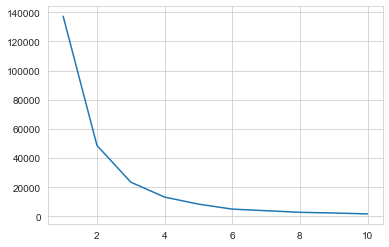

In [59]:
# Use the graph to find the elbow in the graph for use for our cluster
plt.plot(range(1,11), intertia_scores) # Use 3 since this is where the elbow starts

In [60]:
clustering1 = KMeans(n_clusters=3) 

In [61]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [62]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [63]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [64]:
df['Income Cluster'].value_counts()

0    90
2    74
1    36
Name: Income Cluster, dtype: int64

Let's do a groupby to see the mean of each of the columns compared to the income cluster

In [66]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\bovel\AppData\Local\Temp\ipykernel_8580\2057816253.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,37.833333,99.888889,50.638889
2,39.500000,33.486486,50.229730


# Bivariate Clustering

In [70]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']  = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


C:\Users\bovel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


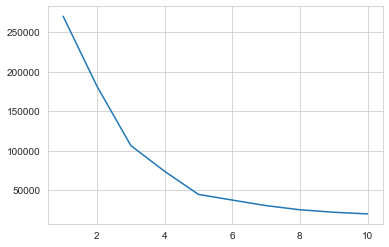

In [71]:
intertia_scores2= []
for i in range(1,11):
    kmeans2= KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), intertia_scores2) 
# Therefore use 5 for our clusters because of the elbow method

In [75]:
clustering2.cluster_centers_ # These are our x and y for each of the cluster

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

In [76]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['X', 'Y']

Now we can create a graph showing our cluster in different colours and where our centers for each cluster would be 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

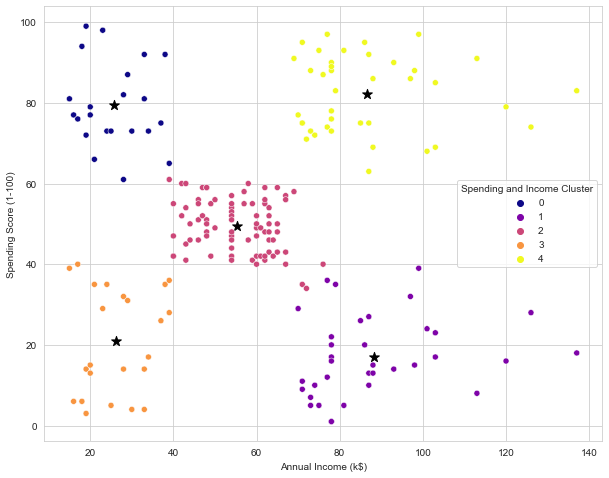

In [83]:
plt.figure(figsize=(10,8))
plt.scatter(x= centers['X'], y= centers['Y'], s=105, marker='*', c='black')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)', hue= 'Spending and Income Cluster', palette='plasma')

In [81]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.592593,0.407407
3,0.608696,0.391304
4,0.538462,0.461538


In [84]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

C:\Users\bovel\AppData\Local\Temp\ipykernel_8580\3377424848.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,42.716049,55.296296,49.518519
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


# Multivariate clustering

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scale= StandardScaler()

In [88]:
dff= pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,1
1,2,21,15,81,2,0,1
2,3,20,16,6,2,3,0
3,4,23,16,77,2,0,0
4,5,31,17,40,2,3,0


In [89]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [91]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [92]:
dff = scale.fit_transform(dff)

In [94]:
dff = pd.DataFrame(scale.fit_transform(dff))

C:\Users\bovel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


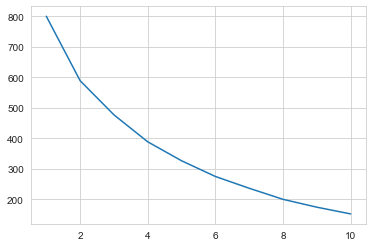

In [96]:
intertia_scores3= []
for i in range(1,11):
    kmeans3= KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), intertia_scores3) # the elbow appears to be at 4

# Conclusion

In this project, we analyzed customer data from a mall to segment and cluster customers based on their demographic and spending behaviour. We conducted univariate analysis on the annual income column to understand its distribution and identify outliers. We also performed bivariate analysis on the annual income and spending score columns to understand their relationship and identify potential clusters.

By using the elbow method, we were able to find the optimal amount of clusters. The elbow method uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters.

Our analysis revealed five distinct clusters of customers based on their annual income and spending score. These clusters can be used to target specific customer groups and develop marketing strategies to increase sales and customer loyalty.

Overall, this project demonstrated the power of clustering algorithms in analyzing customer data and identifying hidden patterns and insights. Future work could involve testing other clustering algorithms and evaluating their performance, collecting more data to improve the accuracy of the model, and integrating the insights from this analysis with the mall's marketing and sales strategies.